# Predicting the Future with Information Theory

In this project I recreate a simulated version of the lecture by Dr. Michelle Effros at Caltech.

## Predicting Unpredictable Events

Imagine you are hiring a psychic. How do you decide who is a good psychic?

A test is devised, where $n$ coins will be flipped.

- A psychic must offer a list of possible outcomes of the coin flips
- The prediction must be accurate at least 90% of the time to be valid
- A more concise prediction set is a better psychic

How would a non-psychic mathematician devise their prediction to maximize their odds?

- Should they request more or less coin flips?

## Mathematical Representation

A coin will land heads at chance $p$ or tails at chance $1-p$.

Let's represent heads with $0$, and tails with $1$.

We can then represent a solution set as:

$$A^n \in \{0, 1\}^n$$

For example, two coin flips would be $A^2 \in \{00, 01, 10, 11\}$

We can represent the conditions and heuristic as such:

- Accurate 90% of the time: $P(A^n) \geq 0.9$
- Concise prediction: $\frac{|A^n|}{2^n}$

## Simulation 

Let's assumine $p = 0.8$; that is, the chance of flipping heads is $80\%$.

Our strategy will be to keep adding to our prediction set until the set becomes correct at least 90% of the time.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

Generate a list of all possible solution sets of size $n$, as well as its likelihood

In [3]:
def intToBinaryList(num, max_len):
    bin_list = [0 for _ in range(max_len)]
    for i in range(num.bit_length()):
        bin_list[max_len - i - 1] = num & 1
        num >>= 1
    return bin_list

def solSet(n):
    return [intToBinaryList(i, n) for i in range(2 ** n)]

solSet(3)

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

Given a solution set, identify the likelihood of each case

In [4]:
def likelihood(sol):
    tails = sum(sol)
    heads = len(sol) - tails
    return (0.8 ** heads) * (0.2 ** tails)
    
def likelihoodSet(n):
    likelihoods = [(sol, likelihood(sol)) for sol in solSet(n)]
    return sorted(likelihoods, key = lambda x: x[1], reverse = True)

likelihoodSet(3)

[([0, 0, 0], 0.5120000000000001),
 ([0, 0, 1], 0.12800000000000003),
 ([0, 1, 0], 0.12800000000000003),
 ([1, 0, 0], 0.12800000000000003),
 ([0, 1, 1], 0.03200000000000001),
 ([1, 0, 1], 0.03200000000000001),
 ([1, 1, 0], 0.03200000000000001),
 ([1, 1, 1], 0.008000000000000002)]

Select the solution set until the 90% requirement is met

In [5]:
def predictionSet(n):
    
    pred_accuracy = 0
    pred_set = []
    
    for sol, likelihood in likelihoodSet(n):
        pred_set.append(sol)
        pred_accuracy += likelihood
        if pred_accuracy > 0.90:
            break
            
    concision = len(pred_set) / 2 ** n
    
    return (pred_set, pred_accuracy, concision)

n = 3
pred_set, accuracy, concision = predictionSet(n)

print("Number of flips:", n)
print("Prediction Set:", pred_set)
print("Accuracy:", accuracy)
print("Concision:", concision)

Number of flips: 0
Prediction Set: [[]]
Accuracy: 1.0
Concision: 1.0


## Plotting Data

Remember that *concision* is the heuristic used, while *accuracy* must exceed 90%

In [25]:
n = 20
data = {
    'num_flips': [i for i in range(1, n)], 
    'accuracy': [predictionSet(i)[1] for i in range(1, n)],
    'concision': [predictionSet(i)[2] for i in range(1, n)],
    'prediction_set': [predictionSet(i)[0] for i in range(1, n)]
}

#df.index.name = 'num_flips'
df = pd.DataFrame(data).set_index('num_flips')

df.head()

,accuracy,concision,prediction_set
num_flips,,,
1,1.00000,1.0000,"[[0], [1]]"
2,0.96000,0.7500,"[[0, 0], [0, 1], [1, 0]]"
3,0.92800,0.6250,"[[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [..."
4,0.92160,0.5625,"[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0,..."
5,0.90112,0.4375,"[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1..."


Graph the concision and accuracy

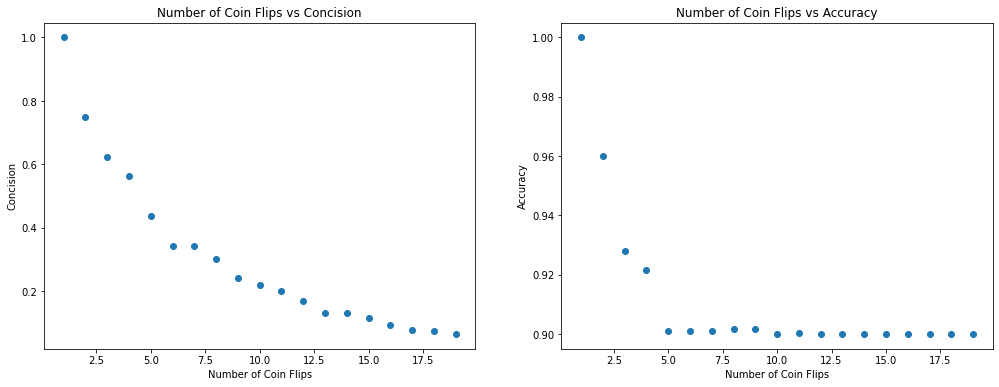

In [59]:
fig, axes = plt.subplots(1, 2,  figsize=(17, 6))

axes[0].scatter(df.index, df["concision"])
axes[0].set_title("Number of Coin Flips vs Concision")
axes[0].set_xlabel("Number of Coin Flips")
axes[0].set_ylabel("Concision")

axes[1].scatter(df.index, df["accuracy"])
axes[1].set_title("Number of Coin Flips vs Accuracy")
axes[1].set_xlabel("Number of Coin Flips")
axes[1].set_ylabel("Accuracy");

## Conclusion

Generally, it seems that accuracy will tend to 90% as expected, as the fractional part decreases in size. As we don't consider accuracy to be a heuristic, this is mostly unimportant.

Concision on the other hand ironically seems to be decreasing as $n$ increases, implying that a prediction set would be *better if more flips were requested*. Although it is intuitive to assume the stochastic nature of a smaller $n$ to be of benefit to the mathematician, it is in fact an incorrect intuition.

# Additional Maths

However, as observed, a larger *n* doesn't mean it is *strictly* better, just *tends* to be better.

Here are some interesting properties:

- $A^{n+1} = \{x^n0, x^n1: x^n \in A^n\}$
- $\frac{|A^{n+1}|}{2^{n+1}} = \frac{2|A^n|}{2\cdot 2^n} = \frac{|A^n|}{2^n}$

\begin{align*}
P(A^{n+1}) &= \sum_{x^{n+1} \in A^n} p(x^{n+1}) \\
&= \sum_{x^n \in A^n} p(x^n0) + p(x^n1) \\
&= \sum_{x^n \in A^n} p(x^n)\cdot (1-p) + p(x^n)\cdot p \\
&= \sum_{x^n \in A^n} p(x^n) \\
&= P(A^n)
\end{align*}

